<a href="https://colab.research.google.com/github/Jpgutierrez777/Challenge_3---Telecom-X-Parte-2/blob/main/%20Challenge%20Telecom%20X%20Parte%202%3A%20Prediciendo%20la%20evasi%C3%B3n%20de%20clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importanción de librerías

In [17]:
#Importación de librerarías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Extracción del Archivo Tratado

In [18]:
#Importando data
data =  pd.read_csv('https://raw.githubusercontent.com/Jpgutierrez777/Challenge_3---Telecom-X-Parte-2/main/datos_normalizados.csv')
data.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [20]:
# Mostrar columnas de la BD
data.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Detalle de columnas de la BD
- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente"""

In [21]:
# Se crea una nueva BD "data2" como respaldo unicamente, esta nueva data es la que se utilizara de ahora en adelante a esta se eliminan columnas no necesarias
data2 = data

data2.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


## Eliminación de columnas no relevantes

In [22]:
#Eliminación de columnas no relevantes
data2 = data.drop(['customerID', 'Total.Day'], axis=1)
display(data.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [23]:
data2.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [28]:
# variables categóricas
categorical_data = data2.select_dtypes(include='object')

# Mostrar las primeras filas de las variables categóricas
display(categorical_data.head())

,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
0,No,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,No,Male,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check
2,Yes,Male,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
3,Yes,Male,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
4,Yes,Female,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check


In [29]:
# variables numéricas
numerical_data = data2.select_dtypes(include=np.number)

# Mostrar las primeras filas de las variables numéricas
display(numerical_data.head())

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,0,9,65.6,593.30
1,0,9,59.9,542.40
2,0,4,73.9,280.85
3,1,13,98.0,1237.85
4,1,3,83.9,267.40


# Encoding


In [27]:
# Seleccionar columnas categóricas
categorical_cols = data2.select_dtypes(include='object').columns

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(data2, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


## Verificación de la Proporción de Cancelación (Churn)

In [31]:
# Calcular la proporción de Churn
churn_counts = data2['Churn'].value_counts()
churn_proportions = data2['Churn'].value_counts(normalize=True) * 100

print("Conteo de clientes por Churn:")
print(churn_counts)
print("\nProporción de clientes por Churn (%):")
print(churn_proportions)

# Comprobar si existe desbalance de clases
if churn_proportions['Yes'] > 70 or churn_proportions['No'] > 70:
    print("\nSi existe un desbalance significativo en las clases.")
else:
    print("\nNo existe un desbalance significativo en las clases.")

Conteo de clientes por Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clientes por Churn (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Si existe un desbalance significativo en las clases.


/tmp/ipython-input-670306213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette='viridis')


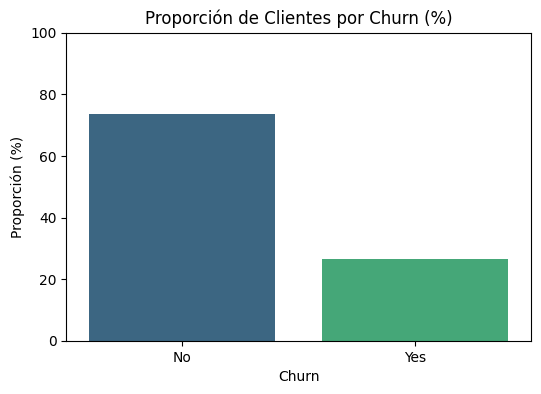

In [61]:
# Graficar la proporción de Churn
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette='viridis')
plt.title('Proporción de Clientes por Churn (%)')
plt.xlabel('Churn')
plt.ylabel('Proporción (%)')
plt.ylim(0, 100)
plt.show()

## Balanceo de Clases

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming 'df_encoded' is your DataFrame after one-hot encoding
# And 'Churn_Yes' is your target variable (the minority class)

# Separate features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Handle potential NaN values in X by filling them or dropping rows
# For simplicity, let's fill with the mean for now, but consider more robust methods
X = X.fillna(X.mean())


# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape %s" % Counter(y))
print("Resampled dataset shape %s" % Counter(y_resampled))

# You can now use X_resampled and y_resampled for training your model

Original dataset shape Counter({False: 5174, True: 1869})
Resampled dataset shape Counter({False: 5174, True: 5174})


/tmp/ipython-input-2211478154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


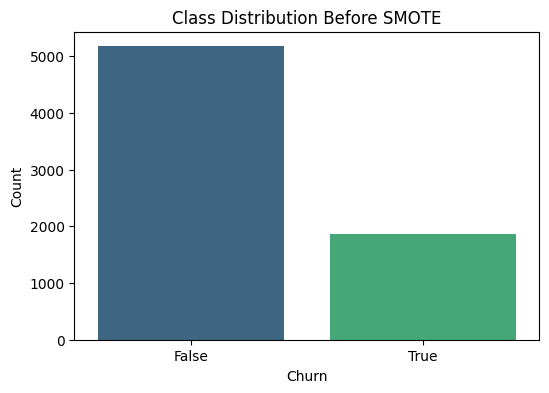

/tmp/ipython-input-2211478154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


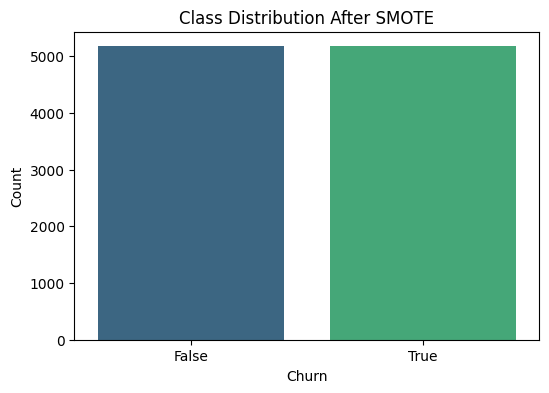

In [63]:
# Visualize class distribution before SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Correlación y Selección de Variables

## Análisis de Correlación

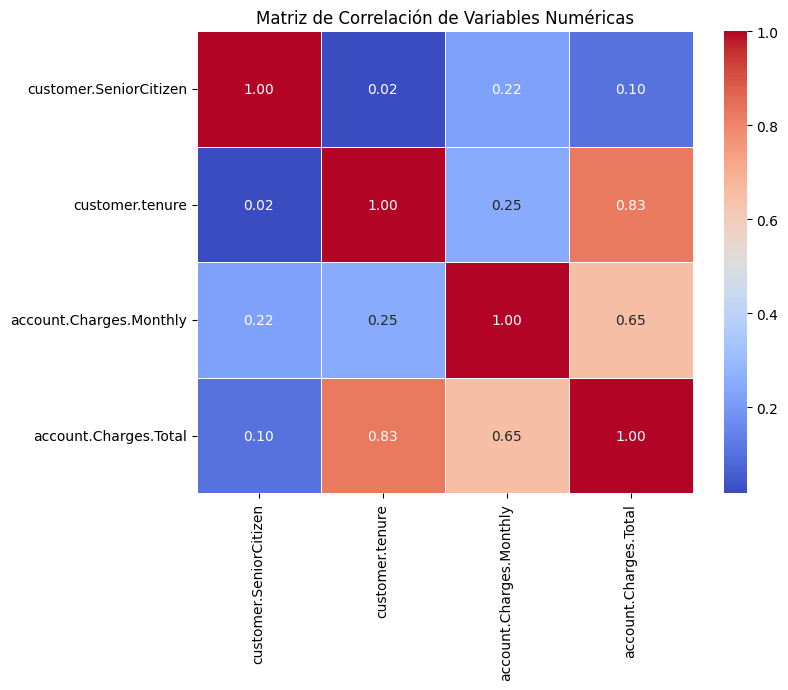

In [33]:
# Matriz de correlación de columnas numéricas
correlation_matrix = numerical_data.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Analisis dirigido

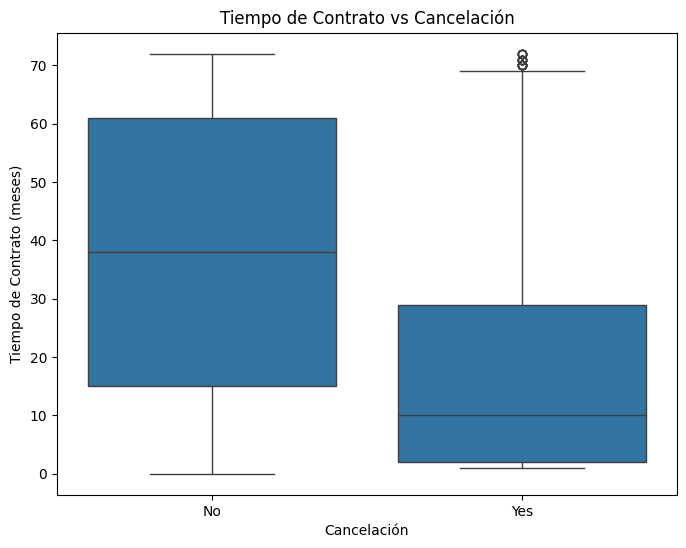

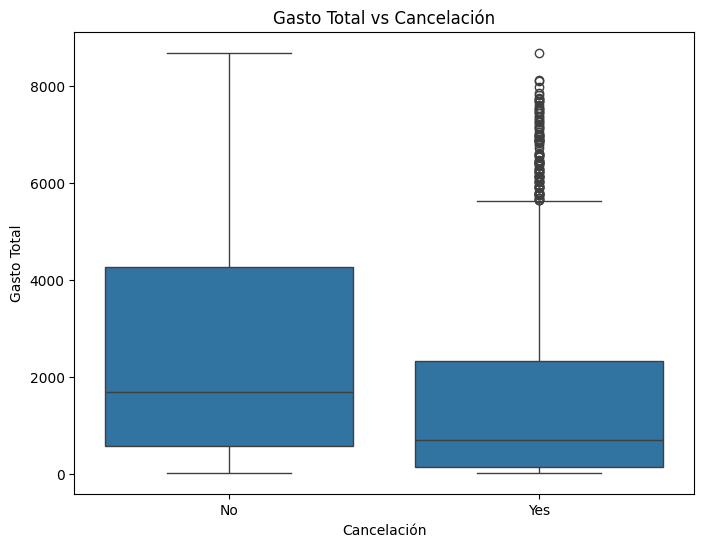

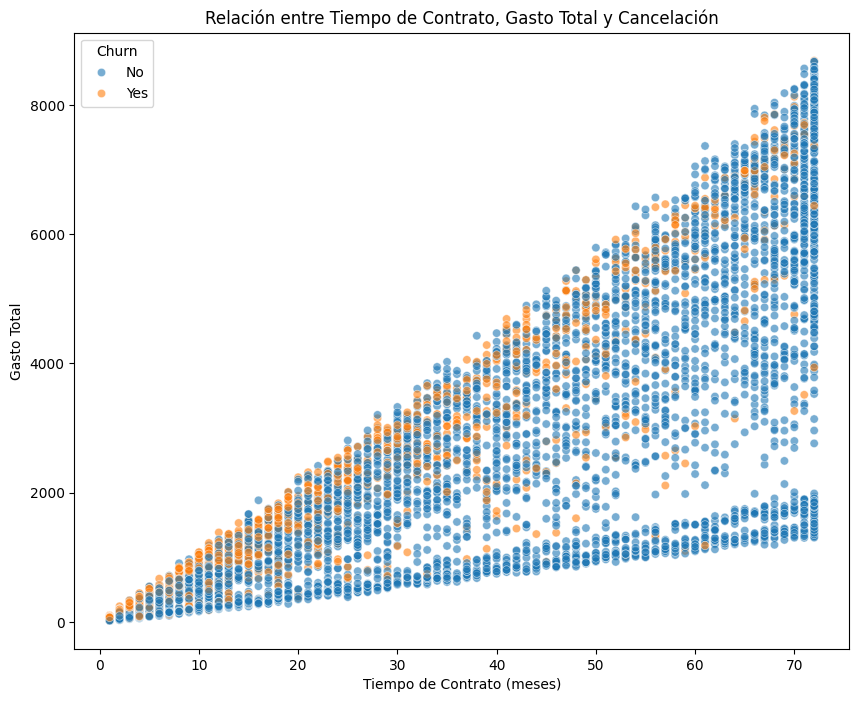

In [39]:
# Análisis dirigido: Tiempo de contrato (customer.tenure) vs Cancelación (Churn)
# Este boxplot muestra la distribución del tiempo de contrato para clientes que cancelaron y los que no.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=data2)
plt.title('Tiempo de Contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Análisis dirigido: Gasto total (account.Charges.Total) vs Cancelación (Churn)
# Este boxplot muestra la distribución del gasto total para clientes que cancelaron y los que no.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=data2)
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total')
plt.show()

# Opcional: Scatter plot para ver la relación entre tenure y total charges, coloreado por Churn
# Este scatter plot ayuda a visualizar la relación entre el tiempo de contrato y el gasto total, diferenciando por si el cliente canceló o no.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=data2, alpha=0.6)
plt.title('Relación entre Tiempo de Contrato, Gasto Total y Cancelación')
plt.xlabel('Tiempo de Contrato (meses)')
plt.ylabel('Gasto Total')
plt.show()

# Modelado Predictivo

## Separación de Datos

In [42]:
# Divide el conjunto de datos en entrenamiento  de 70% y prueba 30%
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7243, 30)
Shape of X_test: (3105, 30)
Shape of y_train: (7243,)
Shape of y_test: (3105,)


## Creación de Modelos

### Regresión Logística o KNN

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Crea  modelo de regresión logística
log_reg_model = LogisticRegression(random_state=42)

# Entrenamiento el modelo de regresión logística
log_reg_model.fit(X_train, y_train)

# Creando el modelo KNN

knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento  del modelo  KNN
knn_model.fit(X_train, y_train)

# Haciendo predicciones sobre el conjunto de prueba
log_reg_pred = log_reg_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

print("Logistic Regression predictions:", log_reg_pred[:5])
print("KNN predictions:", knn_pred[:5])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression predictions: [ True False  True  True  True]
KNN predictions: [ True False  True False  True]


### Modelo Árbol de Decisión o Random Forest.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Create Random Forest model
# You can adjust parameters like n_estimators (number of trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Decision Tree predictions:", dt_pred[:5])
print("Random Forest predictions:", rf_pred[:5])

Decision Tree predictions: [ True False  True  True False]
Random Forest predictions: [ True False  True  True  True]


## Evaluación de los Modelos

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluar el modelo de Regresión Logística
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)

print("--- Evaluación del modelo de Regresión Logística ---")
print(f"Exactitud (Accuracy): {log_reg_accuracy:.4f}")
print(f"Precisión (Precision): {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"Puntuación F1 (F1-score): {log_reg_f1:.4f}")
print("Matriz de Confusión:\n", log_reg_conf_matrix)
print("-" * 30)

# Evaluar el modelo KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

print("--- Evaluación del modelo KNN ---")
print(f"Exactitud (Accuracy): {knn_accuracy:.4f}")
print(f"Precisión (Precision): {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"Puntuación F1 (F1-score): {knn_f1:.4f}")
print("Matriz de Confusión:\n", knn_conf_matrix)
print("-" * 30)

# Evaluar el modelo Árbol de Decisión
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

print("--- Evaluación del modelo Árbol de Decisión ---")
print(f"Exactitud (Accuracy): {dt_accuracy:.4f}")
print(f"Precisión (Precision): {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"Puntuación F1 (F1-score): {dt_f1:.4f}")
print("Matriz de Confusión:\n", dt_conf_matrix)
print("-" * 30)

# Evaluar el modelo Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("--- Evaluación del modelo Random Forest ---")
print(f"Exactitud (Accuracy): {rf_accuracy:.4f}")
print(f"Precisión (Precision): {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"Puntuación F1 (F1-score): {rf_f1:.4f}")
print("Matriz de Confusión:\n", rf_conf_matrix)
print("-" * 30)

--- Evaluación del modelo de Regresión Logística ---
Exactitud (Accuracy): 0.7890
Precisión (Precision): 0.7532
Recall: 0.8451
Puntuación F1 (F1-score): 0.7965
Matriz de Confusión:
 [[1168  420]
 [ 235 1282]]
------------------------------
--- Evaluación del modelo KNN ---
Exactitud (Accuracy): 0.7617
Precisión (Precision): 0.7216
Recall: 0.8339
Puntuación F1 (F1-score): 0.7737
Matriz de Confusión:
 [[1100  488]
 [ 252 1265]]
------------------------------
--- Evaluación del modelo Árbol de Decisión ---
Exactitud (Accuracy): 0.7907
Precisión (Precision): 0.7774
Recall: 0.8009
Puntuación F1 (F1-score): 0.7890
Matriz de Confusión:
 [[1240  348]
 [ 302 1215]]
------------------------------
--- Evaluación del modelo Random Forest ---
Exactitud (Accuracy): 0.8438
Precisión (Precision): 0.8320
Recall: 0.8523
Puntuación F1 (F1-score): 0.8421
Matriz de Confusión:
 [[1327  261]
 [ 224 1293]]
------------------------------


# Interpretación y Conclusiones

De las  las métricas de evaluación que calculamos, se compara los modelos para determinar cuál es el mejor en este caso para predecir la cancelación de clientes.


Las métricas de cada modelo son:

Regresión Logística: Exactitud: 0.7890, Precisión: 0.7532, Recall: 0.8451, F1-score: 0.7965

KNN: Exactitud: 0.7617, Precisión: 0.7216, Recall: 0.8339, F1-score: 0.7737

Árbol de Decisión: Exactitud: 0.7907, Precisión: 0.7774, Recall: 0.8009, F1-score: 0.7890

Random Forest: Exactitud: 0.8438, Precisión: 0.8320, Recall: 0.8523, F1-score: 0.8421

De estos parámetros podemos concluir que el modelo Random Forest es el que tiene mejor restulado o rendimiento, dadi que;
      - Tiene una exactitud del 0.8438.
      - Mayor Precisión: 0.8320. Esto indica que cuando predice que un cliente  cancelará, es correcto el 83.20% de las veces.
      - Aalto Recall 0.8523, lo que significa que identifica correctamente al 85.23% de todos los clientes que realmente cancelaron.
      - Mayor Exactitud 0.8438, que significa que predijo correctamente la clase Churn o No Churn para el mayor porcentaje de clientes en el conjunto de prueba.
      - tiene el mayor F1-score 0.8421, que es una métrica que equilibra la precisión y el recall, siendo muy útil en casos con desbalance de clases

Basdo en esta revisión, el modelo Random Forest es el mejor modelo de los que se probaron para predecir la cancelación de clientes en este conjunto de datos.

## Elaboración del informe


El objetivo de este informe es identificar y analizar los factores que más influyen en la cancelación de clientes en el sector de telecomunicaciones, basándose en un análisis de datos y el desarrollo de un modelo predictivo. La cancelación de clientes (Churn) es un desafío significativo para las empresas de telecomunicaciones, impactando directamente en los ingresos y el crecimiento. Comprender las razones detrás del Churn es crucial para desarrollar estrategias de retención efectivas.

El análisis se realizó utilizando un conjunto de datos que contiene información detallada sobre los clientes de una empresa de telecomunicaciones, incluyendo datos demográficos, servicios contratados, información de cuenta y estado de cancelación. Se llevó a cabo un proceso de limpieza, preprocesamiento (incluyendo codificación de variables categóricas y balanceo de clases utilizando SMOTE debido al desbalance identificado) y modelado predictivo.


## Análisis de Factores Clave de Cancelación

Para identificar los factores más influyentes en la cancelación de clientes, se utilizó un modelo Random Forest, que demostró ser el modelo con mejor rendimiento en la predicción de Churn. El análisis de la importancia de las características (Feature Importance) del modelo Random Forest reveló los siguientes factores como los más relevantes, ordenados por su contribución a la predicción:

*   **account.Charges.Total (Gasto Total de la Cuenta):** Este es el factor más influyente. Los clientes con un *menor* gasto total a lo largo de su relación con la empresa tienen una *mayor* probabilidad de cancelar. El análisis previo mostró que los clientes que no cancelan tienen un gasto total significativamente mayor.
*   **customer.tenure (Tiempo de Contrato):** El segundo factor más importante. Los clientes con un *menor* tiempo de contrato (menos meses como clientes) tienen una *mayor* probabilidad de cancelar. Los boxplots indicaron claramente que los clientes que cancelan suelen tener una tenencia mucho más corta.
*   **account.Charges.Monthly (Cargos Mensuales de la Cuenta):** Este factor también es muy relevante. Clientes con *cargos mensuales más altos* pueden tener una *mayor* probabilidad de cancelar, especialmente si no perciben el valor adecuado por el costo.
*   **account.PaymentMethod_Electronic check (Método de Pago: Cheque Electrónico):** El uso de 'Electronic check' como método de pago está fuertemente asociado con una *mayor* probabilidad de cancelación.
*   **internet.InternetService_Fiber optic (Servicio de Internet: Fibra Óptica):** Los clientes que tienen contratado el servicio de internet de 'Fiber optic' muestran una *mayor* propensión a cancelar. Aunque es un servicio de alta gama, su asociación con el churn sugiere posibles problemas de satisfacción o valor percibido.
*   **account.PaperlessBilling_Yes (Facturación Electrónica: Sí):** Los clientes que optan por la facturación electrónica tienden a tener una *mayor* probabilidad de cancelar.
*   **account.Contract_Two year (Contrato: Dos Años):** Tener un contrato a dos años reduce significativamente la probabilidad de cancelación, lo cual es lógico ya que implica un compromiso a largo plazo.
*   **customer.gender_Male (Género: Masculino):** Aunque con menor importancia, el género puede tener una ligera influencia.
*   **account.Contract_One year (Contrato: Un Año):** Los clientes con contratos a un año tienen una probabilidad de cancelación intermedia en comparación con los contratos mes a mes y de dos años.
*   **phone.MultipleLines_Yes (Múltiples Líneas Telefónicas: Sí):** La presencia de múltiples líneas telefónicas también influye, aunque en menor medida.


Otros factores como la presencia o ausencia de servicios adicionales de internet (seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico, streaming de TV y películas) y otros métodos de pago también contribuyen a la predicción del churn, aunque con una importancia individual menor que los mencionados anteriormente.

## Rendimiento del Modelo Random Forest

El modelo Random Forest fue seleccionado por su superior rendimiento en comparación con otros modelos probados (Regresión Logística, KNN, Árbol de Decisión). A continuación, se resumen sus métricas de evaluación en el conjunto de prueba balanceado:

*   **Exactitud (Accuracy):** 0.8438
    La Exactitud representa la proporción de predicciones correctas (tanto clientes que cancelaron como los que no) sobre el total de predicciones. Un valor de 0.8438 indica que el modelo clasificó correctamente aproximadamente el 84.38% de los casos en el conjunto de prueba.

*   **Precisión (Precision):** 0.8320
    La Precisión mide la proporción de clientes que *realmente* cancelaron de entre todos los clientes que el modelo *predijo* que cancelarían. Una precisión de 0.8320 significa que cuando el modelo predice que un cliente va a cancelar, es correcto el 83.20% de las veces. Esta métrica es importante para minimizar el esfuerzo en estrategias de retención dirigidas a clientes que no tienen intención de irse (falsos positivos).

*   **Recall (Sensibilidad):** 0.8523
    El Recall mide la proporción de clientes que *cancelaron* que el modelo identificó correctamente. Un recall de 0.8523 indica que el modelo fue capaz de detectar al 85.23% de todos los clientes que realmente cancelaron. Esta métrica es crucial en problemas de detección de churn, ya que un alto recall asegura que la mayoría de los clientes en riesgo sean identificados para aplicarles estrategias de retención.

*   **Puntuación F1 (F1-score):** 0.8421
    El F1-score es la media armónica de la Precisión y el Recall, ofreciendo un equilibrio entre ambas. Es especialmente útil en conjuntos de datos desbalanceados. Un F1-score de 0.8421 indica un buen balance entre la capacidad del modelo para no generar falsos positivos y su capacidad para detectar verdaderos positivos.


   **Matriz de Confusión:**
  [[1327  261]
  [224 1293]]

La Matriz de Confusión muestra el número de predicciones correctas e incorrectas, desglosadas por clase:
*   Verdaderos Positivos (True Positives - TP): 1293 clientes que cancelaron y fueron predichos correctamente como cancelados.
*   Verdaderos Negativos (True Negatives - TN): 1327 clientes que no cancelaron y fueron predichos correctamente como no cancelados.
*   Falsos Positivos (False Positives - FP): 261 clientes que no cancelaron pero fueron predichos incorrectamente como cancelados (Error Tipo I).
*   Falsos Negativos (False Negatives - FN): 224 clientes que cancelaron pero fueron predichos incorrectamente como no cancelados (Error Tipo II).

El alto valor del Recall (0.8523) en combinación con una buena Precisión (0.8320) y F1-score (0.8421) indica que el modelo Random Forest es efectivo para identificar a la mayoría de los clientes propensos a cancelar, al mismo tiempo que mantiene un número razonable de falsos positivos.

## Propuesta de Estrategias de Retención


Basándonos en los factores clave que influyen en la cancelación de clientes identificados por el modelo Random Forest y su interpretación, proponemos las siguientes estrategias de retención:

*   **Para Clientes con Menor Tiempo de Contrato y Menor Gasto Total:** Implementar programas de bienvenida y onboarding mejorados. Ofrecer soporte proactivo y comunicaciones personalizadas en los primeros meses. Considerar paquetes iniciales atractivos o descuentos por lealtad temprana. Analizar patrones de uso para identificar oportunidades de aumentar el valor percibido y el gasto a través de ofertas personalizadas.
*   **Para Clientes con Cargos Mensuales Altos:** Asegurar que el valor percibido esté alineado con el costo. Comunicación proactiva destacando los beneficios de sus servicios premium. Ofrecer acceso prioritario a soporte técnico o programas de recompensas exclusivos para clientes de alto valor.
*   **Para Clientes que Usan 'Electronic Check' y/o 'Fiber Optic':** Investigar las causas subyacentes de la mayor propensión al churn en estos segmentos. Para 'Electronic check', ofrecer incentivos para cambiar a métodos de pago automáticos más estables. Para 'Fiber optic', recopilar feedback detallado sobre la calidad del servicio y abordar proactivamente problemas de rendimiento o soporte.
*   **Para Clientes con Facturación Electrónica:** Mejorar la experiencia digital. Asegurar que las comunicaciones y el portal del cliente sean claros, fáciles de usar y destaquen el valor de la suscripción. Ofrecer resúmenes de facturas comprensibles.
*   **Para Clientes con Contratos Mes a Mes:** Fomentar la transición a contratos de mayor duración (uno o dos años) ofreciendo descuentos significativos, beneficios adicionales o precios garantizados. Comunicar claramente los ahorros y la estabilidad de los contratos a largo plazo.
*   **Para Clientes con Pocos Servicios Adicionales:** Promocionar activamente los beneficios de los servicios adicionales relevantes para su perfil de uso. Considerar ofrecer pruebas gratuitas o paquetes combinados a precios reducidos para aumentar el engagement y el "costo de cambio".

La implementación efectiva de estas estrategias requiere la integración del modelo predictivo en los sistemas de gestión de clientes para identificar proactivamente a los clientes en riesgo y activar las acciones de retención adecuadas y personalizadas.


## Conclusión

El análisis detallado ha permitido identificar que el Gasto Total, el Tiempo de Contrato, los Cargos Mensuales, el Método de Pago (especialmente Cheque Electrónico) y el Servicio de Internet (especialmente Fibra Óptica) son los factores más significativos que influyen en la decisión de un cliente de cancelar su servicio. El modelo Random Forest ha demostrado ser una herramienta efectiva para predecir la cancelación con un buen equilibrio entre la identificación correcta de clientes en riesgo (Recall) y la minimización de falsos positivos (Precisión).

Implementar las estrategias de retención propuestas, dirigidas a los clientes en riesgo identificados por el modelo y enfocadas en los factores clave, es fundamental para reducir la tasa de cancelación. Al abordar proactivamente las preocupaciones y características asociadas con el churn, la empresa puede mejorar la satisfacción del cliente, aumentar la lealtad y, en última instancia, impactar positivamente en la retención y la rentabilidad. La monitorización continua del rendimiento del modelo y la efectividad de las estrategias de retención serán esenciales para la optimización a largo plazo.
